In [139]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])

In [140]:
# DEFINING FITTING FUNCTIONS USED FOR THIS LAB ---------------------------------------
def proportionality(x,a):
    global label_error
    label_error = "Proport. Error"
    return a*x
    
def linear(x,a,b):
    global label_error
    label_error = "Linear Error"
    return a*x + b

In [141]:
# DEFINING PLOT FUNCTIONS USED FOR THIS LAB ---------------------------------------
def LinearPlot(xdata,ydata,error,a,b,title,function,color):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    label = label_error
    plt.errorbar(xdata,ydata,yerr=error,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black', label = label)
    if b==0:
        label = r'$\textit{Y = ' + str("{0:.2f}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{0:.2f}".format(a)) + 'X + ' + str("{0:.2f}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ df.columns[0] +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ df.columns[1] +'}$', fontsize = 16)
    plt.title(title, fontsize = 18)
    plt.legend(prop={'size': 15}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figure")

In [142]:
# GENERATING DATAFRAME FROM DATA ---------------------------------------
df = pd.read_csv('data.txt', sep='\t',)
df

,Mass(g),Y(cm),Error(cm)
0,10,8.5,0.4
1,20,12.8,0.4
2,30,17.3,0.4
3,40,20.6,0.4
4,50,24.6,0.4
5,60,29.3,0.4


In [143]:
# SETTING TO SI UNITS ---------------------------------------
df['Mass(g)'] = df['Mass(g)']*10**(-3)
df['Y(cm)'] = df['Y(cm)']*10**(-2)
df['Error(cm)'] = df['Error(cm)']*10**(-2)
df.columns = ['Mass(kg)', 'Y(m)', 'Error(m)']
df

,Mass(kg),Y(m),Error(m)
0,0.01,0.085,0.004
1,0.02,0.128,0.004
2,0.03,0.173,0.004
3,0.04,0.206,0.004
4,0.05,0.246,0.004
5,0.06,0.293,0.004


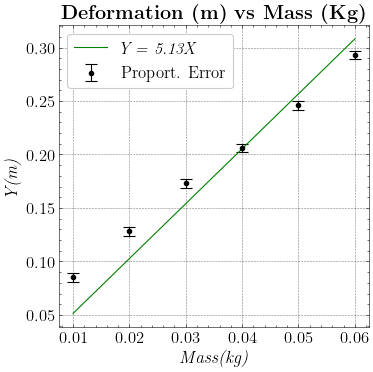

In [144]:
# FITTING THE DATA USING A PROPORTIONAL RELATIONSHIP ---------------------------------------
xdata, ydata, error = df['Mass(kg)'], df['Y(m)'], df['Error(m)']
parameters, covariance = opt.curve_fit(proportionality, xdata, ydata, sigma = error)
slope = parameters[0]
#Calculate the error on the fits from the covariacne matrix
perr = np.sqrt(np.diag(covariance))

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{Deformation (m) vs Mass (Kg)}$'
LinearPlot(xdata,ydata,error,slope,0,title,proportionality,'green')

In [145]:
# CALCULATING SPRING CONSTANT k = g/slope
k = g/slope
k_error = (g/slope**2)*perr[0]
print('The spring constant is (',k,' ± ', k_error,') N/m')

The spring constant is ( 1.9101137626659157  ±  0.08677972279427719 ) N/m


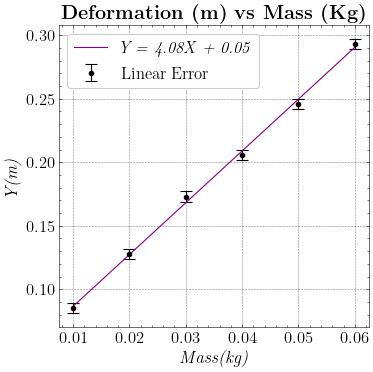

In [152]:
# FITTING THE DATA USING A LINEAR RELATIONSHIP ---------------------------------------
xdata, ydata, error = df['Mass(kg)'], df['Y(m)'], df['Error(m)']
parameters, covariance = opt.curve_fit(linear, xdata, ydata, sigma = error)
slope = parameters[0]
b = parameters[1]

#Calculate the error on the fits from the covariacne matrix
perr = np.sqrt(np.diag(covariance))
slope_error = perr[0]
b_error = perr[1]

# PLOTTING THE DATA ---------------------------------------
title = r'$\textbf{Deformation (m) vs Mass (Kg)}$'
LinearPlot(xdata,ydata,error,slope,b,title,linear,'purple')

In [153]:
# CALCULATING SPRING CONSTANT k = g/slope
k = g/slope
k_error = (g/slope**2)*slope_error
print('The spring constant is (',k,' ± ', k_error,') N/m')

The spring constant is ( 2.405275053585256  ±  0.052333441636782385 ) N/m


In [157]:
# CALCULATING EFFECTIVE MASS m_eff
m_eff = k*b/g
m_error = np.sqrt(((-b/slope**2)*slope_error)**2 + ((1/slope)*b_error)**2)
print('The effective mass is (',m_eff,' ± ', m_error,') Kg')

The effective mass is ( 0.011233356712110747  ±  0.0008818894801838027 ) Kg


In [138]:
# DEFINING THE PENDULUM PERIOD FUNCTION
def period(l):
    return 2*pi*np.sqrt(l/g)

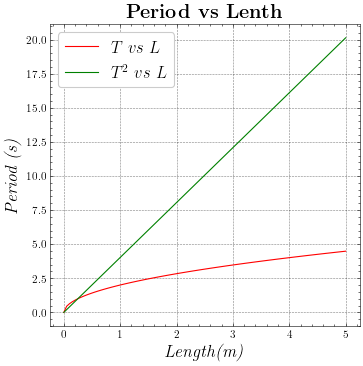

In [158]:
x = np.linspace(0,5,100)
y1 = period(x)
y2 = period(x)**2
fig = plt.figure(figsize=(5, 5), dpi=80)
plt.plot(x,y1, 'r', label=r'$T \ vs \ L$')
plt.plot(x,y2, 'g', label=r'$T^2 \ vs \ L$')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\textit{Length(m)}$', fontsize = 16)
plt.ylabel(r'$\textit{Period (s)}$', fontsize = 16)
plt.title(r"$\textbf{Period vs Lenth}$", fontsize = 18)
plt.legend(prop={'size': 15}, loc=2)
plt.savefig("Figure")

In [60]:
parameters, covariance = opt.curve_fit(period, x, y2, sigma=0)
slope = parameters[0]

ValueError: Unable to determine number of fit parameters.

In [45]:
gravity = 4*pi**2/slope
print("Gravity is: ", gravity, "m/s2")

Gravity is:  9.869604401089358 m/s2


In [43]:
1/slope

1.3202735250360194